In [2]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
features_path = r"C:\Users\marie\rep_codes\udder_project\udder_processing\features_dict\gmfeature_table.csv"
data_path = r"C:\Users\marie\rep_codes\udder_project\delpro_vms\data_out"
data_path2 = r"C:\Users\marie\rep_codes\udder_project\delpro_vms\more_reports\oneyear_data.csv"

In [4]:
animaldf = pd.read_csv(r"C:\Users\marie\rep_codes\udder_project\delpro_vms\animal_info.csv", sep = ";")
animaldf.columns = [col.replace(" ", "_").lower().replace("-", "") for col in animaldf.columns]
fresh_dates = animaldf[["animal_number", "last_calving_date"]]
fresh_dates["fresh_date"] = pd.to_datetime(fresh_dates["last_calving_date"], format = '%m/%d/%Y')
fresh_dates = fresh_dates[~fresh_dates.fresh_date.isnull()]
fresh_dates = fresh_dates.drop("last_calving_date", axis = 1)
fresh_dates = fresh_dates[(~fresh_dates.animal_number.isna())]
df = pd.read_csv(data_path2, sep = ";")
df.columns = [col.replace(" ", "_").lower().replace("-", "") for col in df.columns]
df["date"] = pd.to_datetime(df["date"], format = '%m/%d/%Y')
merged_df =  pd.merge(fresh_dates, df,  left_on="animal_number", right_on = "animal_number")

merged_df["dim"] = (merged_df["date"] - merged_df["fresh_date"]).dt.days
df2 = merged_df[merged_df.dim >= 0]

C:\Users\marie\AppData\Local\Temp\ipykernel_19288\1189977421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fresh_dates["fresh_date"] = pd.to_datetime(fresh_dates["last_calving_date"], format = '%m/%d/%Y')


In [5]:
tnf_d = pd.read_csv( r"C:\Users\marie\rep_codes\udder_project\delpro_vms\data_out\tnf_daily.csv")
ko_d = pd.read_csv( r"C:\Users\marie\rep_codes\udder_project\delpro_vms\data_out\ko_daily.csv").drop(["date", "lactation_number"], axis = 1)

In [6]:
temp = df2[['animal_number', 'days_in_milk', 'incomplete']].merge(tnf_d, left_on = ['animal_number', 'days_in_milk'], right_on = ['animal_number', 'dim'], how = 'right').merge(ko_d, on = ['animal_number', 'dim'], how = 'right')
pd.set_option('display.max_columns', None)
temp[temp.incomplete ==1]

,animal_number,days_in_milk,incomplete,date,dim,lactation_number,LR,RF,RR,LF,All,udder,dudder,dtnf_lr,dtnf_lf,dtnf_rf,dtnf_rr,ko_lr,ko_lf,ko_rf,ko_rr,dko_lr,dko_lf,dko_rf,dko_rr,dko_udder
186,254,65.0,1.0,2023-01-17,65,7,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,2,0,1,0,1,0,1
220,254,77.0,1.0,2023-01-29,77,7,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
234,254,81.0,1.0,2023-02-02,81,7,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,1,0,0,2,0,0,0,1,0,1
241,254,84.0,1.0,2023-02-05,84,7,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
330,254,113.0,1.0,2023-03-06,113,7,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150565,1501,16.0,1.0,2023-11-12,16,1,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,1,1,1,0,0,1,1,0,0,1
150572,1501,20.0,1.0,2023-11-16,20,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,1,1,1,1,1,1,1
150594,1504,2.0,1.0,2023-11-07,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150595,1504,3.0,1.0,2023-11-08,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


72

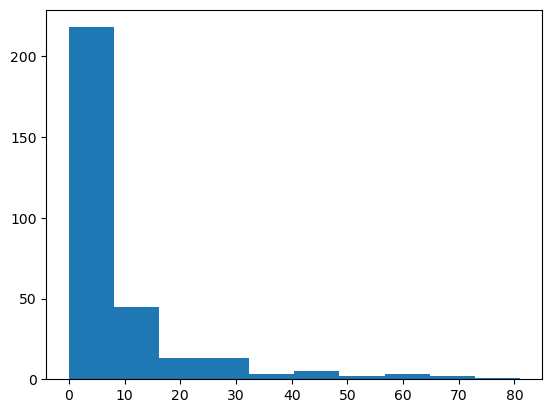

In [36]:
file = "ko_integrated.csv"
data_df = pd.read_csv(os.path.join(data_path, file))
x = data_df["dko_udder_dim_cl"]
plt.hist(x)
sum(x>0)
cows_ko = set(data_df[x>10].cow)
len(cows_ko)

37

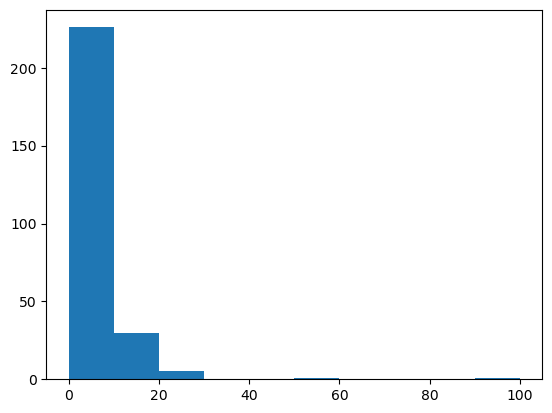

In [41]:
file = "mtnf_integrated.csv"
data_df = pd.read_csv(os.path.join(data_path, file))
x = data_df["dtnf_udder_nd_7d"]
plt.hist(x)
sum(x>0)
cows_tnf = set(data_df[x>5].cow)
len(cows_tnf)

In [45]:
file = "inc_integrated.csv"
data_df = pd.read_csv(os.path.join(data_path, file))
x = data_df["dinc_nd_7d"]
plt.hist(x)
cows_inc = set(data_df[x>5].cow)
len(cows_inc)

KeyError: 'dinc_nd_7d'

In [15]:
print(len(cows_inc.intersection(cows_tnf)))
print(len(cows_inc.intersection(cows_ko)))
print(len(cows_ko.intersection(cows_tnf)))
print(len(cows_ko.intersection(cows_tnf).intersection(cows_inc)))

35
3
2
2


In [12]:
cows_tnf

{571,
 686,
 904,
 962,
 970,
 1092,
 1178,
 1192,
 1216,
 1237,
 1262,
 1291,
 1300,
 1325,
 1328,
 1329,
 1335,
 1362,
 1380,
 1389,
 1396,
 1401,
 1406,
 1409,
 1412,
 1424,
 1429,
 1433,
 1453,
 1457,
 1472,
 1476,
 1480,
 1487,
 1501,
 1507,
 1511}

In [13]:
cows_ko

{764,
 783,
 970,
 1089,
 1098,
 1099,
 1102,
 1172,
 1207,
 1215,
 1266,
 1267,
 1270,
 1281,
 1306,
 1368,
 1372,
 1397,
 1398,
 1399,
 1400,
 1401}